In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
FILE = os.path.join(os.getcwd(), 'sales_by_month.csv')
df = pd.read_csv(FILE, encoding='utf-8-sig', index_col=0)
display(df)

,一月,二月,三月,四月,五月,六月,七月,八月,九月,十月,十一月,十二月
月份,,,,,,,,,,,,
2010,13031,7769,12849,11387,10456,10896,12140,13730,14474,13604,11580,12944
2011,17676,6882,13248,9942,10464,11010,10977,10510,11815,12961,9998,14557
2012,10916,8464,12245,9992,11243,9953,11439,11906,12371,13635,10656,13361
2013,18395,5910,12099,12397,12894,9800,13310,14391,14335,13275,11939,16097
2014,17243,8357,12634,14840,13427,11955,14068,13525,13532,14255,12372,13769
2015,22332,9091,12850,14510,11356,14873,12719,14629,14066,15485,12463,15966
2016,22230,7409,13666,17285,11560,16950,14544,16888,16153,18358,12180,21894
2017,19470,8257,19759,14566,16986,15507,15440,15011,17848,17450,14040,18891
2018,19470,8257,19759,14566,16986,15507,15440,15011,17848,17450,14040,18891


In [19]:
linked_sales = list()
for m, sales in df.items():
    linked_sales += list(sales)
# print(len(linked_sales))
# print(linked_sales)


df = pd.DataFrame(data=linked_sales, columns=['ts'], index=pd.date_range(start='1/2010', end='1/2020', freq='M'))
display(df)


,ts
2010-01-31,13031
2010-02-28,17676
2010-03-31,10916
2010-04-30,18395
2010-05-31,17243
...,...
2019-08-31,15966
2019-09-30,21894
2019-10-31,18891
2019-11-30,18891


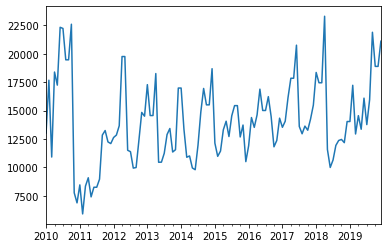

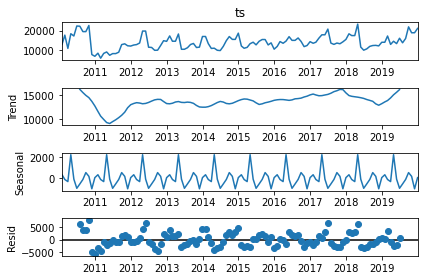

In [25]:
df.ts.plot()
decomposition = seasonal_decompose(df.ts, freq=12)
fig = decomposition.plot()

In [27]:
from statsmodels.tsa.stattools import adfuller   #Dickey-Fuller test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure()
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  #autolag : {‘AIC’, ‘BIC’, ‘t-stat’, None}
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [30]:
df['seasonal'] = df.ts - df.ts.shift(12)  
display(df)

,ts,seasonal
2010-01-31,13031,NaN
2010-02-28,17676,NaN
2010-03-31,10916,NaN
2010-04-30,18395,NaN
2010-05-31,17243,NaN
...,...,...
2019-08-31,15966,4027.0
2019-09-30,21894,9522.0
2019-10-31,18891,6428.0
2019-11-30,18891,6711.0


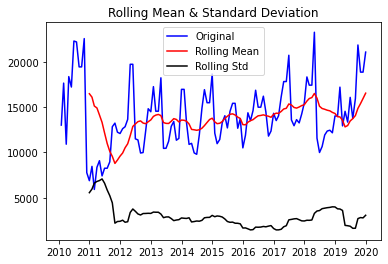

Results of Dickey-Fuller Test:
Test Statistic                  -5.159224
p-value                          0.000011
#Lags Used                       0.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [31]:
test_stationarity(df.ts)

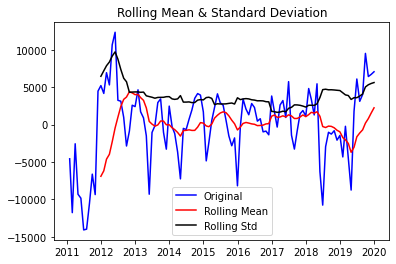

Results of Dickey-Fuller Test:
Test Statistic                 -5.062088
p-value                         0.000017
#Lags Used                     11.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
